# 1.1 Fixed Kneepoint (self)

In [1]:
# load raw h5 matrix
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
soup = False
# load raw h5 matrix
h5_raw = sc.read_10x_h5('../data/raw_feature_bc_matrix.h5')
h5_raw.var_names_make_unique()

# load filtered h5 matrix
h5_filtered = sc.read_10x_h5('../data/filtered_feature_bc_matrix.h5')
h5_filtered.var_names_make_unique()

# loaded for 2.2. and 3.
if soup:
    h5_pyED = sc.read_h5ad("../data/pyED_correct_soupx.h5ad")
else:
    h5_pyED = sc.read_h5ad("../data/pyED_correct.h5ad")

# Load the rED results
h5_rED = sc.read_h5ad('../data/niters10000_rED_results.h5ad')
h5_rED.var_names_make_unique()

/Users/oskarhaupt/Library/Python/3.9/lib/python/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
/Users/oskarhaupt/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/oskarhaupt/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/oskarhaupt/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them uni

## KneepointPlot raw/filtered

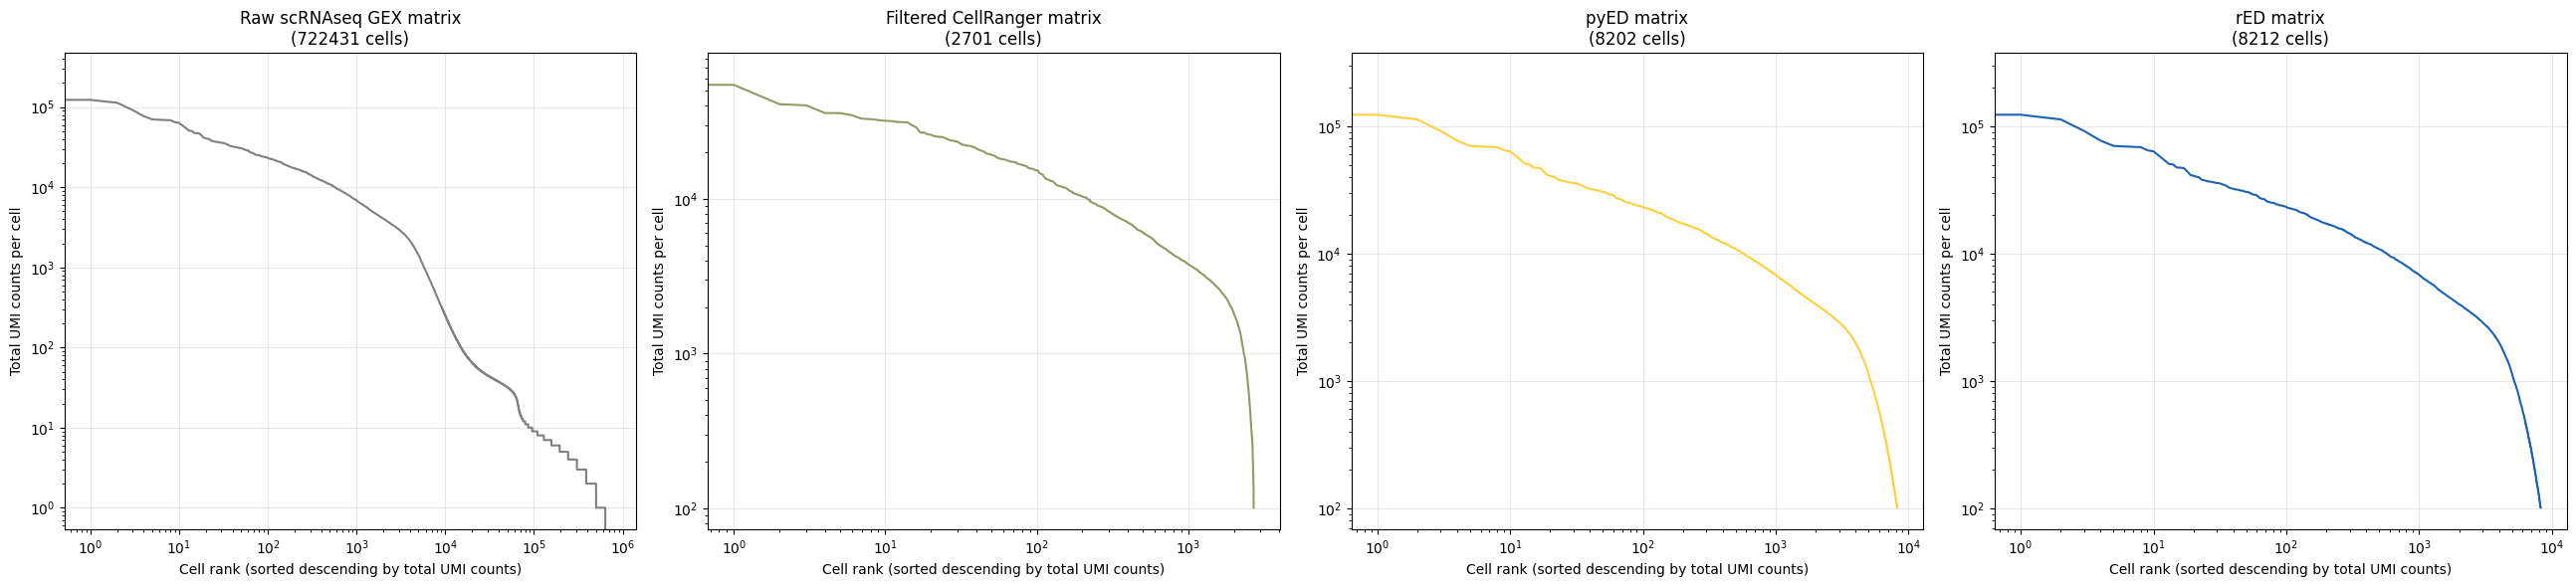

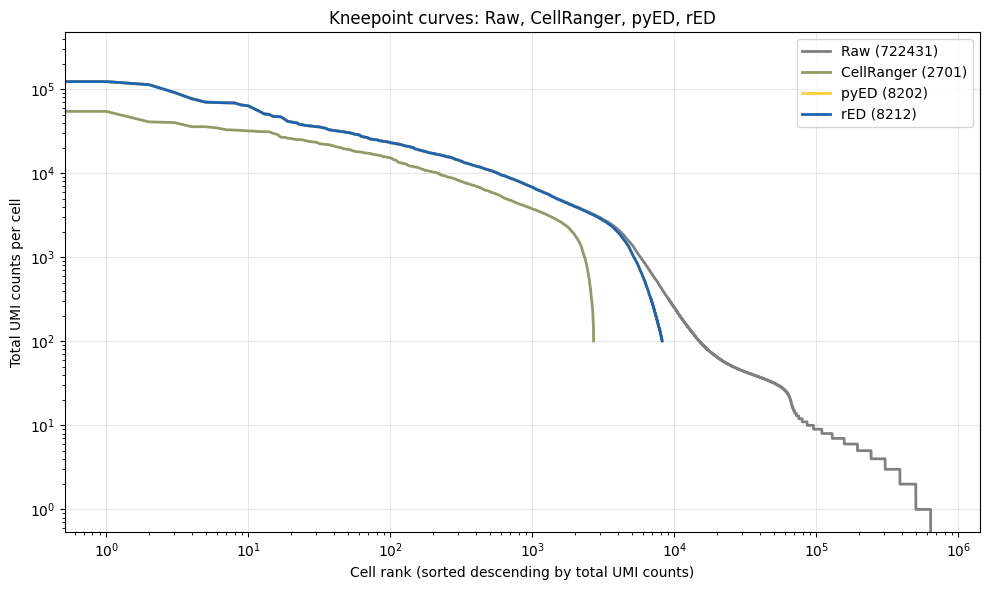

CellRanger chose around the 0.0165 quantile with ~3258 UMI counts in this cell at the cutoff


In [3]:
# Calculate total UMI counts per cell in X for all four matrices
h5_raw.obs['total_counts'] = h5_raw.X.sum(axis=1)
h5_filtered.obs['total_counts'] = h5_filtered.X.sum(axis=1)
h5_pyED.obs['total_counts'] = h5_pyED.X.sum(axis=1)
h5_rED.obs['total_counts'] = h5_rED.X.sum(axis=1)

# Sort all matrices by descending total UMI counts per cell
h5_raw_sorted = h5_raw[h5_raw.obs.total_counts.argsort()[::-1]]
h5_filtered_sorted = h5_filtered[h5_filtered.obs.total_counts.argsort()[::-1]]
h5_pyED_sorted = h5_pyED[h5_pyED.obs.total_counts.argsort()[::-1]]
h5_rED_sorted = h5_rED[h5_rED.obs.total_counts.argsort()[::-1]]

# Colors from cell 130–131 in notebook (colors used for rED/pyED/CellRanger):
color_raw = 'grey'
color_rED = '#1D63B4'
color_pyED = '#FFCF3E'
color_cellranger = '#929a65'

# Create a new figure with 4 subplots, one for each method
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(26, 6))

# Plot raw matrix (leftmost subplot)
ax1.plot(h5_raw_sorted.obs.total_counts.values, color=color_raw)
ax1.set_xlabel('Cell rank (sorted descending by total UMI counts)')
ax1.set_ylabel('Total UMI counts per cell')
ax1.set_title(f'Raw scRNAseq GEX matrix\n({h5_raw_sorted.shape[0]} cells)')
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')
ax1.set_xscale('log')

# Plot filtered CellRanger matrix (second subplot)
ax2.plot(h5_filtered_sorted.obs.total_counts.values, color=color_cellranger)
ax2.set_xlabel('Cell rank (sorted descending by total UMI counts)')
ax2.set_ylabel('Total UMI counts per cell')
ax2.set_title(f'Filtered CellRanger matrix\n({h5_filtered_sorted.shape[0]} cells)')
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')
ax2.set_xscale('log')

# Plot pyED matrix (third subplot)
ax3.plot(h5_pyED_sorted.obs.total_counts.values, color=color_pyED)
ax3.set_xlabel('Cell rank (sorted descending by total UMI counts)')
ax3.set_ylabel('Total UMI counts per cell')
ax3.set_title(f'pyED matrix\n({h5_pyED_sorted.shape[0]} cells)')
ax3.grid(True, alpha=0.3)
ax3.set_yscale('log')
ax3.set_xscale('log')

# Plot rED matrix (fourth subplot)
ax4.plot(h5_rED_sorted.obs.total_counts.values, color=color_rED)
ax4.set_xlabel('Cell rank (sorted descending by total UMI counts)')
ax4.set_ylabel('Total UMI counts per cell')
ax4.set_title(f'rED matrix\n({h5_rED_sorted.shape[0]} cells)')
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')
ax4.set_xscale('log')

plt.tight_layout()

# Save the 4-panel figure
import os
os.makedirs("figures", exist_ok=True)
fig.savefig("figures/03_kneepoint_raw_filtered_pyED_rED.png", dpi=300)
plt.show()

# Create a figure for all overlays together
plt.figure(figsize=(10, 6))
plt.plot(h5_raw_sorted.obs.total_counts.values, label=f'Raw ({h5_raw_sorted.shape[0]})', color=color_raw, linewidth=2)
plt.plot(h5_filtered_sorted.obs.total_counts.values, label=f'CellRanger ({h5_filtered_sorted.shape[0]})', color=color_cellranger, linewidth=2)
plt.plot(h5_pyED_sorted.obs.total_counts.values, label=f'pyED ({h5_pyED_sorted.shape[0]})', color=color_pyED, linewidth=2)
plt.plot(h5_rED_sorted.obs.total_counts.values, label=f'rED ({h5_rED_sorted.shape[0]})', color=color_rED, linewidth=2)

plt.xlabel('Cell rank (sorted descending by total UMI counts)')
plt.ylabel('Total UMI counts per cell')
plt.yscale('log')
plt.xscale('log')
plt.title('Kneepoint curves: Raw, CellRanger, pyED, rED')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig("figures/01_kneepoint_all-overlay.png", dpi=300)
plt.show()

print("CellRanger chose around the 0.0165 quantile with ~3258 UMI counts in this cell at the cutoff")

## calculate kneepoint M

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def kneepoint_loglog(counts, lower_q=0.01, upper_q=0.95):
    """
    Kneepoint via max perpendicular distance in log10(rank)-log10(count) space.

    lower_q/upper_q: optional quantile window to avoid noisy extremes.
    Returns: dict with knee index/coords, distances, and projection point.
    """
    y = np.asarray(counts).flatten()
    n = len(y)
    ranks = np.arange(1, n+1)

    # valid for log axes
    pos = y > 0
    xv  = ranks[pos]
    yv  = y[pos]

    # optional window (helps with long zero tails & early shoulder)
    lo = int(np.floor(np.quantile(np.arange(len(xv)), lower_q)))
    hi = int(np.ceil (np.quantile(np.arange(len(xv)), upper_q)))
    xv = xv[lo:hi]
    yv = yv[lo:hi]

    X = np.log10(xv)
    Y = np.log10(yv)

    # chord in log space
    A = np.array([X[0], Y[0]], dtype=float)
    B = np.array([X[-1], Y[-1]], dtype=float)
    AB = B - A
    ab2 = np.dot(AB, AB)

    # perpendicular distances to AB in log space
    P = np.column_stack([X, Y])
    AP = P - A
    # 2D cross-product magnitude: |AB_x*AP_y - AB_y*AP_x|
    cross = np.abs(AB[0]*AP[:,1] - AB[1]*AP[:,0])
    dists = cross / np.sqrt(ab2)

    k_rel = int(np.argmax(dists))        # index within window
    knee_x_log, knee_y_log = P[k_rel]
    # projection scalar onto AB (clamped to segment)
    t = np.clip(np.dot(AP[k_rel], AB) / ab2, 0.0, 1.0)
    proj_log = A + t * AB

    # map back to original indexing/values
    knee_rank = int(10**knee_x_log + 0.5)            # nearest rank
    # recover original index in the full array
    knee_idx_full = int(xv[k_rel] - 1)               # 0-based index in counts
    knee_count = y[knee_idx_full]
    print(f"for the upper quantile of {upper_q} is rank {knee_rank}, with a count of {knee_count}")

    return {
        "knee_index": knee_idx_full,
        "knee_rank": knee_rank,
        "knee_count": knee_count,
        "distances": dists,
        "window_start_rank": int(xv[0]),
        "window_end_rank": int(xv[-1]),
        "A_log": A, "B_log": B,
        "knee_log": np.array([knee_x_log, knee_y_log]),
        "proj_log": proj_log
    }

# --- use it
res = kneepoint_loglog(h5_raw_sorted.obs.total_counts.values, lower_q=0.0, upper_q=1)

counts = h5_raw_sorted.obs.total_counts.values
ranks  = np.arange(1, len(counts)+1)
pos    = counts > 0

for the upper quantile of 1 is rank 2996, with a count of 2988.0


## plot kneepoint M
- first i made the error of not using log on the x scale. then i calculated the kneepoint on the un-log'ed data but looked at the final plot with the log data and was confused why the kneepoint wasnt right. 
- so i had to change the calculations on the log scale too. 
- after that we lost the perpendicularity on the log axis since the transformation did not went trough that 
    - FIX through ax.set_aspect("equal", adjustable="datalim")  # preserves right angles in log space

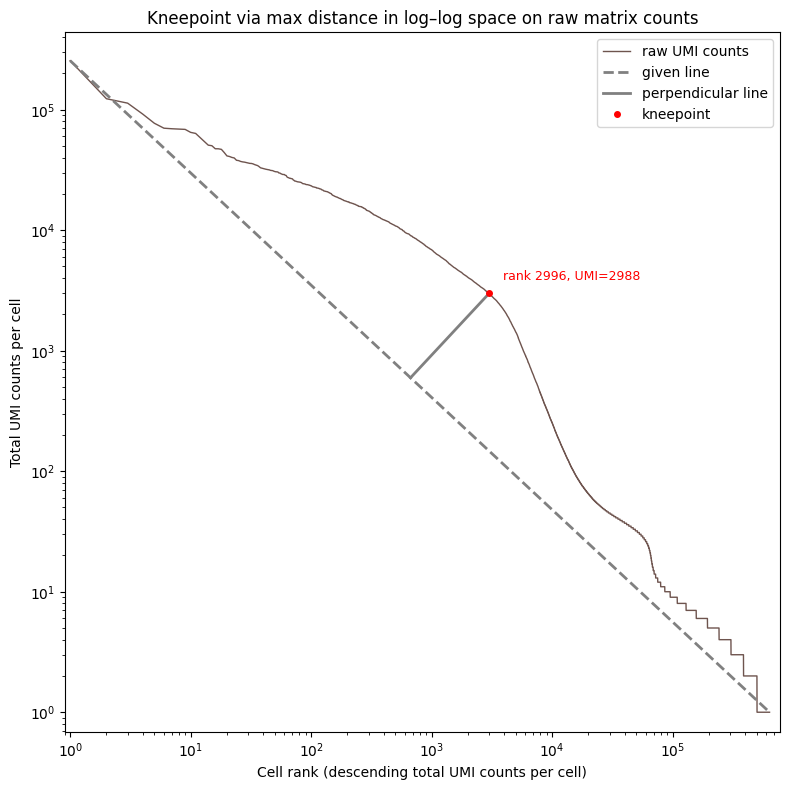

Knee at index 2995 (rank 2996), UMI=2988.0
Search window: ranks 1–637030


In [5]:
# raw knee point line
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(ranks[pos], counts[pos], label="raw UMI counts", lw=1, alpha=1, color="#6e544e")

# Z line (in log space, then back to linear for plotting)
A_log, B_log = res["A_log"], res["B_log"]
Zx = 10**np.array([A_log[0], B_log[0]])
Zy = 10**np.array([A_log[1], B_log[1]])
ax.plot(Zx, Zy, "--", lw=2, label="given line", alpha=1, color="#808080")

# kneepoint + perpendicular both derived in log space
kx, ky = 10**res["knee_log"]
px, py = 10**res["proj_log"]
# perpendicular line
ax.plot([kx, px], [ky, py], "-", lw=2, label="perpendicular line", alpha=1, color="#808080")
# kneepoint point
ax.plot(kx, ky, "o", ms=4, label=f"kneepoint", zorder=5, color="red")
# Add annotation for kneepoint
ax.annotate(f"rank {res['knee_rank']}, UMI={res['knee_count'].astype(int)}", 
            xy=(kx, ky), 
            xytext=(10, 10), 
            textcoords='offset points',
            fontsize=9,
            ha='left',
            color="red")

ax.set_xscale("log"); ax.set_yscale("log")
ax.set_aspect("equal", adjustable="datalim")  # preserves right angles in log space
ax.set_xlabel("Cell rank (descending total UMI counts per cell)")
ax.set_ylabel("Total UMI counts per cell")
ax.set_title("Kneepoint via max distance in log–log space on raw matrix counts")
ax.legend()
ax.set_ylim(1, 300000); ax.set_xlim(1, 700000)
plt.tight_layout()
plt.savefig("figures/02_chord_kneepoint_raw.png", dpi=300)
plt.show()

print(f"Knee at index {res['knee_index']} (rank {res['knee_rank']}), UMI={res['knee_count']}")
print(f"Search window: ranks {res['window_start_rank']}–{res['window_end_rank']}")

## compare M to CR()

In [6]:
# check which cells from filtered matrix are in raw above the kneepoint of a total umi count of 2988
knee_threshold = res['knee_count']
print(f"Kneepoint threshold: {knee_threshold} UMI counts")

# Get cells above kneepoint in raw data
cells_above_knee = h5_raw_sorted.obs_names[h5_raw_sorted.obs.total_counts >= knee_threshold]
print(f"Number of cells above kneepoint in raw data: {len(cells_above_knee)}")

# Check overlap with filtered matrix

filtered_cells = set(h5_filtered.obs_names)
raw_above_knee = set(cells_above_knee)

overlap = filtered_cells.intersection(raw_above_knee)
print(f"Number of filtered cells: {len(filtered_cells)}")
print(f"Number of filtered cells above kneepoint: {len(overlap)}")
print(f"Percentage of filtered cells above kneepoint: {len(overlap)/len(filtered_cells)*100:.1f}%")

# Cells in filtered but below kneepoint
below_knee = filtered_cells - raw_above_knee
print(f"Filtered cells below kneepoint: {len(below_knee)}")

Kneepoint threshold: 2988.0 UMI counts
Number of cells above kneepoint in raw data: 2996
Number of filtered cells: 2701
Number of filtered cells above kneepoint: 1393
Percentage of filtered cells above kneepoint: 51.6%
Filtered cells below kneepoint: 1308


## plot compare M to CR()

Min total counts: 101.0
Max total counts: 63580.0


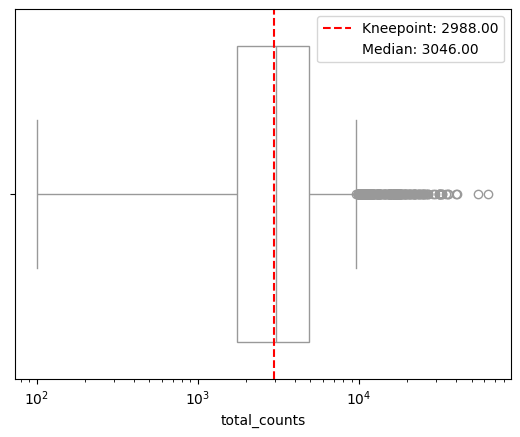

In [7]:
# print a box plot of all filtered cells and their total umi counts
sns.boxplot(data=h5_filtered.obs, x='total_counts', color='white')
plt.xscale('log')
# insert calculated threshold of res
plt.axvline(res['knee_count'], color='red', linestyle='--', label=f'Kneepoint: {res["knee_count"]:.2f}')
# insert number of median to the plot
plt.axvline(h5_filtered.obs.total_counts.median(), color='red', linestyle='--', label=f'Median: {h5_filtered.obs.total_counts.median():.2f}', visible=False)

print(f"Min total counts: {h5_filtered.obs.total_counts.min()}"); print(f"Max total counts: {h5_filtered.obs.total_counts.max()}")
plt.legend()
plt.savefig("figures/03_CR_kneepoint_vs_called_cells_boxplot.png", dpi=300)
plt.show()

# ideas
(Check FDR performance RED vs PyED (0.001, 0.01, 0.05) over each 10 runs on niters 10k)
- 1 CR Performance prüfen
    - 1.1 (DONE) Eigenen Threshold in raw setzen und mit filtered matrix vergleichen
    - 1.2 Plot erstellen mit Wkeit, dass Zelle von CR gefunden wird

- 2 ED Performance prüfen
    - 2.1 Eigenen Threshold in raw setzen und mit PyED & RED matrix vergleichen
    - 2.2 Plot erstellen mit Wkeit, dass Zelle von CR gefunden wird

- 3 gesammelten Plot erstellen, der Darstellt die Wkeit dass eine Zelle von einem der 3 Algorithmen entdeckt wird.

# 1.2 probability Cell in CR()
- out of the 15k cells above lower (=100) cellranger labeled 2701 as "real" cells
- each droplet therefore has a UMI count ci
- Detection probability p(c) is the empirical chance that a droplet with a given count c is called a real cell.
- Because counts are discrete and noisy, i will estimate p(c) with binning or smoothing

## Empirical Estimate

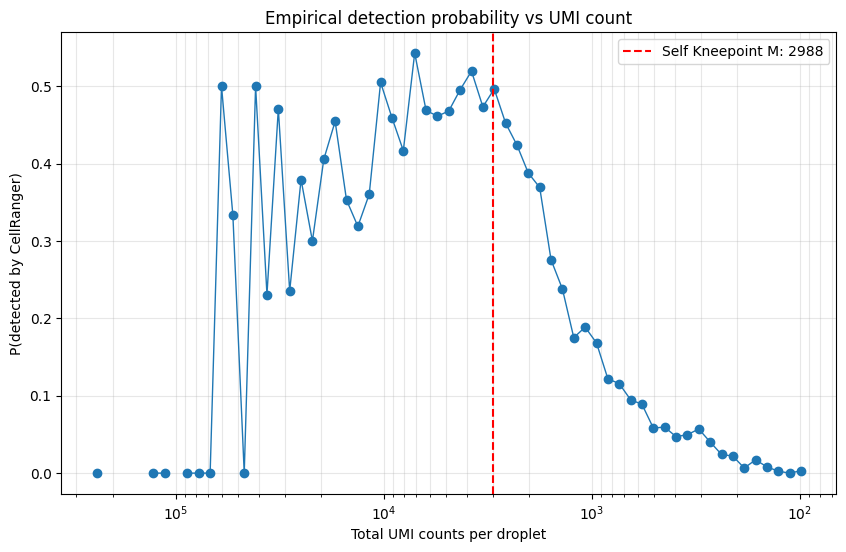

In [8]:
def plot_empirical_detection_probability(h5_raw, h5_filtered, kneepoint=2988, title_suffix="", save_at="figures/05_pyED_empirical_detection_probability.png"):
    """
    Plot empirical detection probability for cell detection.
    
    Parameters:
    -----------
    h5_raw : AnnData
        Raw count matrix
    h5_filtered : AnnData  
        Filtered count matrix (detected cells)
    kneepoint : float, optional
        Kneepoint value to mark on plot (default: 2988)
    title_suffix : str, optional
        Suffix to add to plot title
    
    Returns:
    --------
    dict : Dictionary containing probability data and bin centers
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy.stats import binned_statistic

    # Create df as union of h5_filtered and h5_raw above total_counts of 100
    # Filter h5_raw to cells with total_counts > 100
    # create total_counts column in h5_raw
    h5_raw.obs['total_counts'] = h5_raw.X.sum(axis=1)
    h5_raw_filtered = h5_raw[h5_raw.obs.total_counts > 100].copy()

    # Create dataframe with UMI counts and detection status
    df = pd.DataFrame({
        'umi': h5_raw_filtered.obs.total_counts,
        'detected': h5_raw_filtered.obs.index.isin(h5_filtered.obs.index).astype(int)
    })

    bins = np.logspace(np.log10(1), np.log10(df["umi"].max()), 100)
    prob, edges, _ = binned_statistic(df["umi"], df["detected"], statistic='mean', bins=bins)
    centers = (edges[:-1] + edges[1:]) / 2

    plt.figure(figsize=(10,6))
    plt.semilogx(centers, prob, 'o-', lw=1)
    plt.axvline(kneepoint, color='red', linestyle='--', label=f'Self Kneepoint M: {kneepoint}')
    plt.xlabel('Total UMI counts per droplet')
    plt.ylabel('P(detected by CellRanger)')
    plt.title(f'Empirical detection probability vs UMI count{title_suffix}')
    plt.legend()
    plt.grid(True, which='both', alpha=0.3)
    # mirror the plot around the x axis
    plt.gca().invert_xaxis()
    plt.savefig(save_at, dpi=300)
    plt.show()
    
    return {'prob': prob, 'centers': centers, 'df': df}

# Call the function
if soup:
    result = plot_empirical_detection_probability(h5_raw, h5_filtered, save_at = "figures/04_soup_CR_empirical_detection_probability.png")
else:
    result = plot_empirical_detection_probability(h5_raw, h5_filtered, save_at = "figures/04_CR_empirical_detection_probability.png")


## Monte Carlo modeling
Pr(detected ∣ c) = 1 / ( 1 + e^-(a+b * log10(c)) )

In [9]:
def plot_detection_probability(h5_raw, h5_filtered, kneepoint=None, title_suffix="", saveat="figures/05_pyED_detection_probability.png"):
    """
    Plot empirical detection probability and logistic fit for cell detection.
    
    Parameters:
    -----------
    h5_raw : AnnData
        Raw count matrix
    h5_filtered : AnnData  
        Filtered count matrix (detected cells)
    kneepoint : float, optional
        Kneepoint value to mark on plot
    title_suffix : str, optional
        Suffix to add to plot title
    
    Returns:
    --------
    dict : Dictionary containing model parameters and data
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy.stats import binned_statistic
    import statsmodels.api as sm
    
    # Create total_counts column in h5_raw
    h5_raw.obs['total_counts'] = h5_raw.X.sum(axis=1)
    h5_raw_filtered = h5_raw[h5_raw.obs.total_counts > 100].copy()

    # Create dataframe with UMI counts and detection status
    df = pd.DataFrame({
        'umi': h5_raw_filtered.obs.total_counts,
        'detected': h5_raw_filtered.obs.index.isin(h5_filtered.obs.index).astype(int)
    })

    bins = np.logspace(np.log10(1), np.log10(df["umi"].max()), 100)
    prob, edges, _ = binned_statistic(df["umi"], df["detected"], statistic='mean', bins=bins)
    centers = (edges[:-1] + edges[1:]) / 2

    df = df[df["umi"] > 0].copy()
    df["log_umi"] = np.log10(df["umi"])
    X = sm.add_constant(df["log_umi"])
    model = sm.Logit(df["detected"], X).fit(disp=False)
    a, b = model.params

    umi_range = np.logspace(0, np.log10(df["umi"].max()), 200)
    p_pred = 1 / (1 + np.exp(-(a + b * np.log10(umi_range))))

    plt.figure(figsize=(10,6))
    plt.semilogx(umi_range, p_pred, 'r-', lw=3, label='Logistic fit')
    plt.semilogx(centers, prob, 'o', color='gray', label='Empirical')
    
    if kneepoint is not None:
        plt.axvline(kneepoint, color='red', linestyle='--', label=f'Kneepoint: {kneepoint}')
    
    plt.xlabel('Total UMI counts per droplet')
    plt.ylabel('Detection probability')
    plt.legend()
    plt.grid(True, which='both', alpha=0.3)
    plt.title(f'Detection probability{title_suffix}')
    plt.gca().invert_xaxis()
    plt.savefig(saveat, dpi=300)
    plt.show()
    
    return {
        'model_params': {'a': a, 'b': b},
        'empirical_data': {'centers': centers, 'prob': prob},
        'prediction_data': {'umi_range': umi_range, 'p_pred': p_pred}
    }

# Use the function
#result = plot_detection_probability(h5_raw, h5_filtered, kneepoint=2988, title_suffix=" (CellRanger)")

# 2.2 probability Cell in pyED()

In [23]:
# #import ED results
# csv_pyED = pd.read_csv('../data/niters10000_results_20251027_163307.csv')
# print(csv_pyED.head())
# # rename first colum to barcode
# csv_pyED.rename(columns={csv_pyED.columns[0]: 'Barcode'}, inplace=True)
# # filter for fdr not nan
# csv_pyED = csv_pyED[csv_pyED['FDR'] < 0.05]
# print(csv_pyED.shape)
# # save as h5ad
# h5_pyED = sc.AnnData(X=h5_raw[csv_pyED.index].X, obs=csv_pyED, var=h5_raw.var)
# print(h5_pyED)
# # save h5ad to current directory
# h5_pyED.write('../data/niters10000_pyED_results.h5ad')
# h5_pyED.var_names_make_unique()

# #remove Total PValue and FDR from obs
# h5_pyED.obs.drop(columns=['Total', 'PValue', 'FDR'], inplace=True)

# # make the current column barcode the index
# h5_pyED.obs.set_index('Barcode', inplace=True)
# h5_pyED.obs



## Empirical Estimate

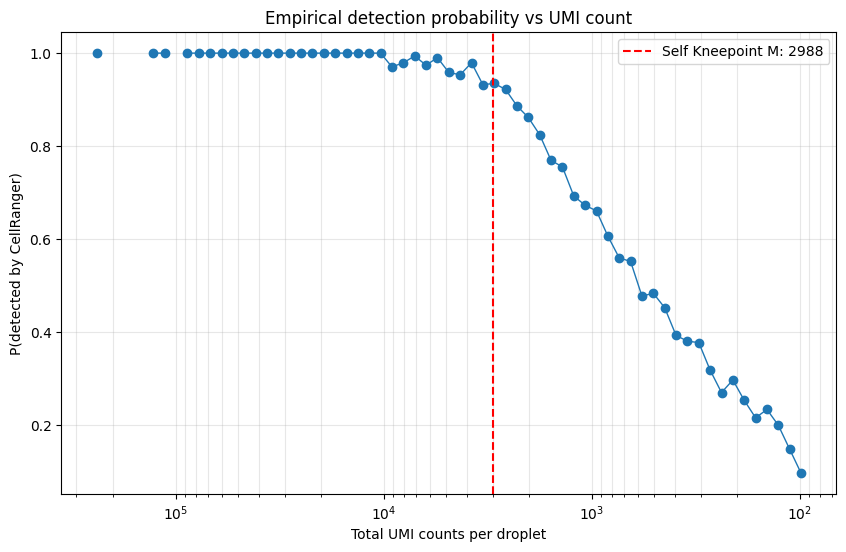

In [24]:
#def plot_empirical_detection_probability(h5_raw, h5_filtered, kneepoint=2988, title_suffix=""):
if soup:
    edresult = plot_empirical_detection_probability(h5_raw, h5_pyED, kneepoint=2988, title_suffix="", save_at = "figures/05_soup_pyED_empirical_detection_probability.png")
else:
    edresult = plot_empirical_detection_probability(h5_raw, h5_pyED, kneepoint=2988, title_suffix="", save_at = "figures/05_pyED_empirical_detection_probability.png")


## monte Carlo modeling

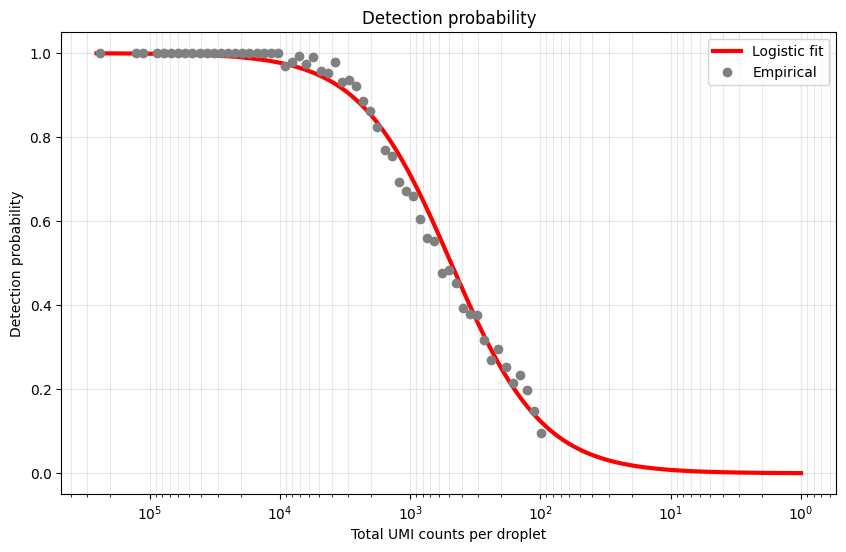

In [25]:
#plot_detection_probability(h5_raw, h5_filtered, kneepoint=None, title_suffix=""):
if soup:
    edresults = plot_detection_probability(h5_raw, h5_pyED, kneepoint=None, title_suffix="", saveat="figures/05_soup_pyED_detection_probability.png")
else:
    edresults = plot_detection_probability(h5_raw, h5_pyED, kneepoint=None, title_suffix="", saveat="figures/05_pyED_detection_probability.png")

# 3. Monte Carlo for all 3

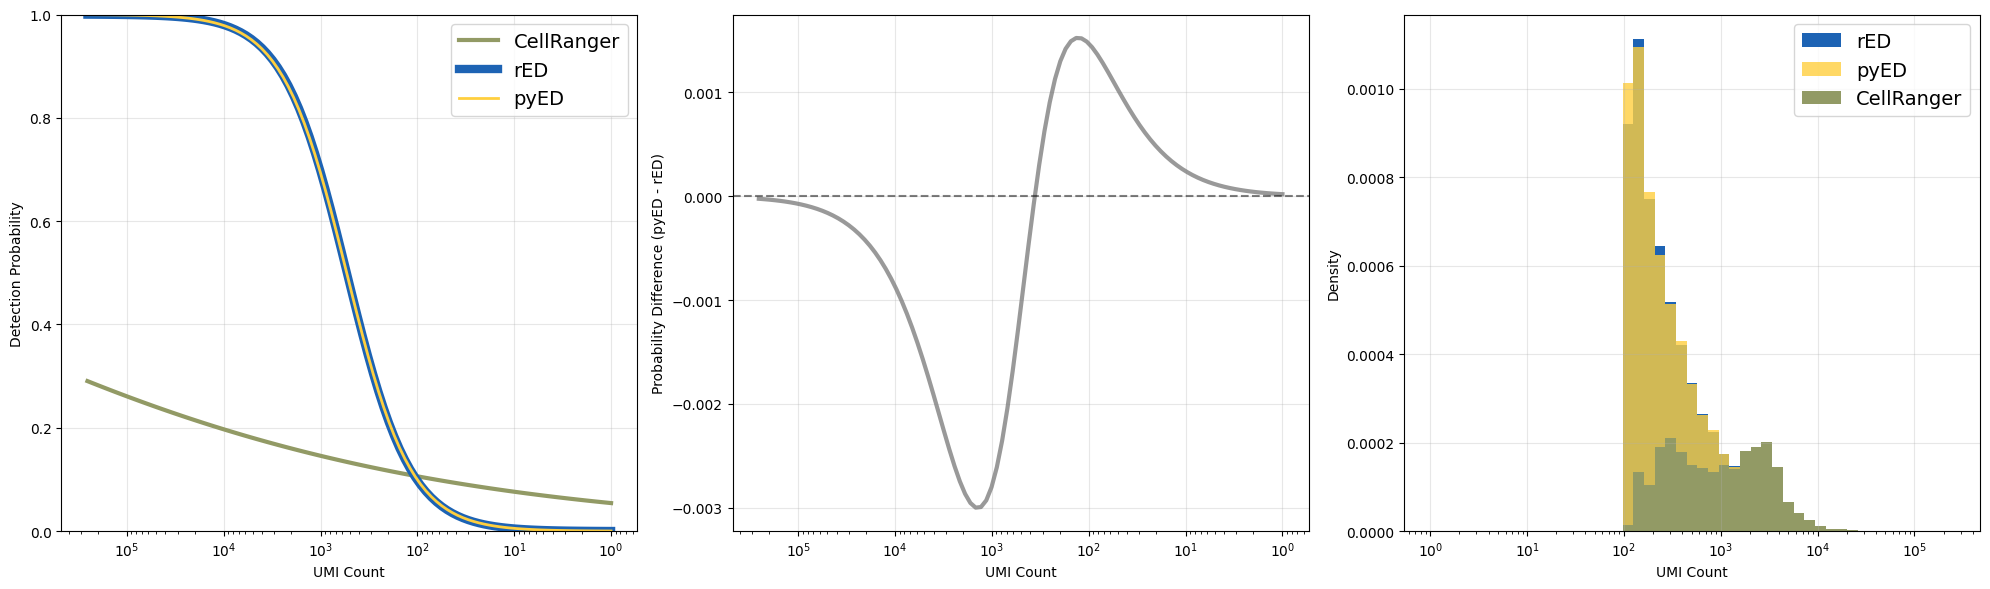

COMPREHENSIVE METHOD COMPARISON

CELL DETECTION SUMMARY:
Total cells in raw data: 722,431
CellRanger detected: 2,701 (0.4%)
pyED detected: 8,202 (1.1%)
rED detected: 8,212 (1.1%)

DETECTION THRESHOLDS (50% probability):
CellRanger: 73533572.5 UMI
pyED: 537.4 UMI
rED: 535.3 UMI

MEDIAN UMI COUNTS:
CellRanger: 3046.0
pyED: 1897.0
rED: 1904.0

CELL OVERLAP ANALYSIS:
pyED ∩ rED: 7,841 cells (95.6% of smaller set)
CellRanger ∩ pyED: 2,666 cells
CellRanger ∩ rED: 2,666 cells
All three methods: 2,661 cells

UNIQUE DETECTIONS:
Only pyED: 356 cells
Only rED: 366 cells
Only CellRanger: 30 cells


In [23]:
# Monte Carlo modeling for all three methods (CellRanger, pyED, rED)

# Get the filtered datasets for each method
h5_cellranger = h5_filtered  # Already loaded
# h5_pyED already loaded above
# h5_rED already loaded above

# Create a combined analysis with multiple visualization approaches
def plot_comprehensive_method_comparison(h5_raw, h5_cellranger, h5_pyED, h5_rED, kneepoint=None, title_suffix="", saveat="figures/05_comprehensive_method_comparison.pdf"):
    """
    Comprehensive comparison of all three methods with multiple visualization approaches
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy import stats
    from scipy.interpolate import interp1d
    from scipy.optimize import minimize_scalar
    import seaborn as sns

    # Get UMI counts for raw data
    umi_counts_raw = np.array(h5_raw.X.sum(axis=1)).flatten()

    # Get UMI counts for each filtered method
    umi_counts_cellranger = np.array(h5_cellranger.X.sum(axis=1)).flatten()
    umi_counts_pyED = np.array(h5_pyED.X.sum(axis=1)).flatten()
    umi_counts_rED = np.array(h5_rED.X.sum(axis=1)).flatten()

    # Create a comprehensive figure with multiple subplots
    fig = plt.figure(figsize=(20, 6))

    # 1. Detection probability curves (top left)
    ax1 = plt.subplot(1, 3, 1)

    # Define UMI range for modeling
    min_umi = max(1, min(umi_counts_raw))
    max_umi = max(umi_counts_raw)
    umi_range = np.logspace(np.log10(min_umi), np.log10(max_umi), 100)

    def fit_detection_model(umi_counts_filtered, umi_counts_raw):
        """Fit a logistic model to detection probability"""
        # Create bins for empirical estimation
        umi_bins = np.logspace(np.log10(min_umi), np.log10(max_umi), 30)
        empirical_probs = []
        bin_centers = []

        for i in range(len(umi_bins)-1):
            bin_start, bin_end = umi_bins[i], umi_bins[i+1]
            bin_center = np.sqrt(bin_start * bin_end)
            bin_centers.append(bin_center)

            # Find cells in this UMI range
            raw_in_bin = (umi_counts_raw >= bin_start) & (umi_counts_raw < bin_end)
            filtered_in_bin = (umi_counts_filtered >= bin_start) & (umi_counts_filtered < bin_end)

            n_raw_in_bin = np.sum(raw_in_bin)
            n_filtered_in_bin = np.sum(filtered_in_bin)

            if n_raw_in_bin > 0:
                prob = n_filtered_in_bin / n_raw_in_bin
            else:
                prob = 0

            empirical_probs.append(prob)

        # Fit logistic function
        def logistic_model(params, umi_vals):
            threshold, scale = params
            log_umi = np.log10(umi_vals)
            return 1 / (1 + np.exp(-(log_umi - threshold) / scale))

        def objective(params):
            predicted = logistic_model(params, bin_centers)
            return np.sum((np.array(empirical_probs) - predicted) ** 2)

        threshold_init = np.log10(np.median(umi_counts_filtered))
        scale_init = 0.5

        from scipy.optimize import minimize
        result = minimize(objective, [threshold_init, scale_init], method='Nelder-Mead')

        if result.success:
            optimal_params = result.x
        else:
            optimal_params = [threshold_init, scale_init]

        smooth_probs = logistic_model(optimal_params, umi_range)
        return smooth_probs, optimal_params

    # Fit models
    smooth_probs_cellranger, params_cellranger = fit_detection_model(umi_counts_cellranger, umi_counts_raw)
    smooth_probs_pyED, params_pyED = fit_detection_model(umi_counts_pyED, umi_counts_raw)
    smooth_probs_rED, params_rED = fit_detection_model(umi_counts_rED, umi_counts_raw)

    ax1.plot(umi_range, smooth_probs_cellranger, '-', label='CellRanger', color='#929a65', linewidth=3, alpha=1)
    ax1.plot(umi_range, smooth_probs_rED, '-', label='rED', color='#1D63B4', linewidth=6, alpha=1)
    ax1.plot(umi_range, smooth_probs_pyED, '-', label='pyED', color='#FFCF3E', linewidth=2, alpha=1)
    

    ax1.set_xscale('log')
    ax1.set_xlabel('UMI Count')
    ax1.set_ylabel('Detection Probability')
    # no title
    ax1.invert_xaxis()
    ax1.legend(fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 1)

    # 2. Difference plot: pyED vs rED (top middle)
    ax2 = plt.subplot(1, 3, 2)
    diff_py_r = smooth_probs_pyED - smooth_probs_rED
    ax2.plot(umi_range, diff_py_r, '-', color='grey', linewidth=3, alpha=0.8)
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.set_xscale('log')
    ax2.set_xlabel('UMI Count')
    ax2.set_ylabel('Probability Difference (pyED - rED)')
    # no title
    ax2.invert_xaxis()
    ax2.grid(True, alpha=0.3)

    # 3. UMI distribution comparison (top right)
    ax3 = plt.subplot(1, 3, 3)

    # Create histogram data
    bins = np.logspace(np.log10(min_umi), np.log10(max_umi), 50)

    ax3.hist(umi_counts_rED, bins=bins, alpha=1, label='rED', color='#1D63B4', density=True)
    ax3.hist(umi_counts_pyED, bins=bins, alpha=0.8, label='pyED', color='#FFCF3E', density=True)
    ax3.hist(umi_counts_cellranger, bins=bins, alpha=1, label='CellRanger', color='#929a65', density=True)

    ax3.set_xscale('log')
    ax3.set_xlabel('UMI Count')
    ax3.set_ylabel('Density')
    # no title
    ax3.legend(fontsize=14)
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(saveat[:-4]+".pdf", dpi=300)
    plt.show()

    # Print detailed comparison statistics
    print("="*80)
    print("COMPREHENSIVE METHOD COMPARISON")
    print("="*80)

    print(f"\nCELL DETECTION SUMMARY:")
    print(f"Total cells in raw data: {len(umi_counts_raw):,}")
    print(f"CellRanger detected: {len(umi_counts_cellranger):,} ({len(umi_counts_cellranger)/len(umi_counts_raw)*100:.1f}%)")
    print(f"pyED detected: {len(umi_counts_pyED):,} ({len(umi_counts_pyED)/len(umi_counts_raw)*100:.1f}%)")
    print(f"rED detected: {len(umi_counts_rED):,} ({len(umi_counts_rED)/len(umi_counts_raw)*100:.1f}%)")

    print(f"\nDETECTION THRESHOLDS (50% probability):")
    print(f"CellRanger: {10**params_cellranger[0]:.1f} UMI")
    print(f"pyED: {10**params_pyED[0]:.1f} UMI") 
    print(f"rED: {10**params_rED[0]:.1f} UMI")

    print(f"\nMEDIAN UMI COUNTS:")
    print(f"CellRanger: {np.median(umi_counts_cellranger):.1f}")
    print(f"pyED: {np.median(umi_counts_pyED):.1f}")
    print(f"rED: {np.median(umi_counts_rED):.1f}")

    # Calculate overlap between methods
    cellranger_barcodes = set(h5_cellranger.obs.index)
    pyED_barcodes = set(h5_pyED.obs.index)
    rED_barcodes = set(h5_rED.obs.index)

    overlap_py_r = len(pyED_barcodes & rED_barcodes)
    overlap_cr_py = len(cellranger_barcodes & pyED_barcodes)
    overlap_cr_r = len(cellranger_barcodes & rED_barcodes)
    overlap_all = len(cellranger_barcodes & pyED_barcodes & rED_barcodes)

    print(f"\nCELL OVERLAP ANALYSIS:")
    print(f"pyED ∩ rED: {overlap_py_r:,} cells ({overlap_py_r/min(len(pyED_barcodes), len(rED_barcodes))*100:.1f}% of smaller set)")
    print(f"CellRanger ∩ pyED: {overlap_cr_py:,} cells")
    print(f"CellRanger ∩ rED: {overlap_cr_r:,} cells")
    print(f"All three methods: {overlap_all:,} cells")

    # Unique to each method
    unique_pyED = len(pyED_barcodes - rED_barcodes - cellranger_barcodes)
    unique_rED = len(rED_barcodes - pyED_barcodes - cellranger_barcodes)
    unique_cellranger = len(cellranger_barcodes - pyED_barcodes - rED_barcodes)

    print(f"\nUNIQUE DETECTIONS:")
    print(f"Only pyED: {unique_pyED:,} cells")
    print(f"Only rED: {unique_rED:,} cells")
    print(f"Only CellRanger: {unique_cellranger:,} cells")

    return {
        'umi_range': umi_range,
        'smooth_probs_cellranger': smooth_probs_cellranger,
        'smooth_probs_pyED': smooth_probs_pyED,
        'smooth_probs_rED': smooth_probs_rED,
        'difference_py_r': diff_py_r,
        'overlap_stats': {
            'py_r': overlap_py_r,
            'cr_py': overlap_cr_py,
            'cr_r': overlap_cr_r,
            'all_three': overlap_all
        }
    }

# Run the comprehensive comparison analysis
if soup:
    comparison_results = plot_comprehensive_method_comparison(
        h5_raw, h5_cellranger, h5_pyED, h5_rED, 
        kneepoint=None, 
        title_suffix="",
        saveat="figures/05_soup_comprehensive_method_comparison.pdf"
    )
else:
    comparison_results = plot_comprehensive_method_comparison(
        h5_raw, h5_cellranger, h5_pyED, h5_rED, 
        kneepoint=None, 
        title_suffix="",
        saveat="figures/05_comprehensive_method_comparison.pdf"
    )

# pyED vs CR

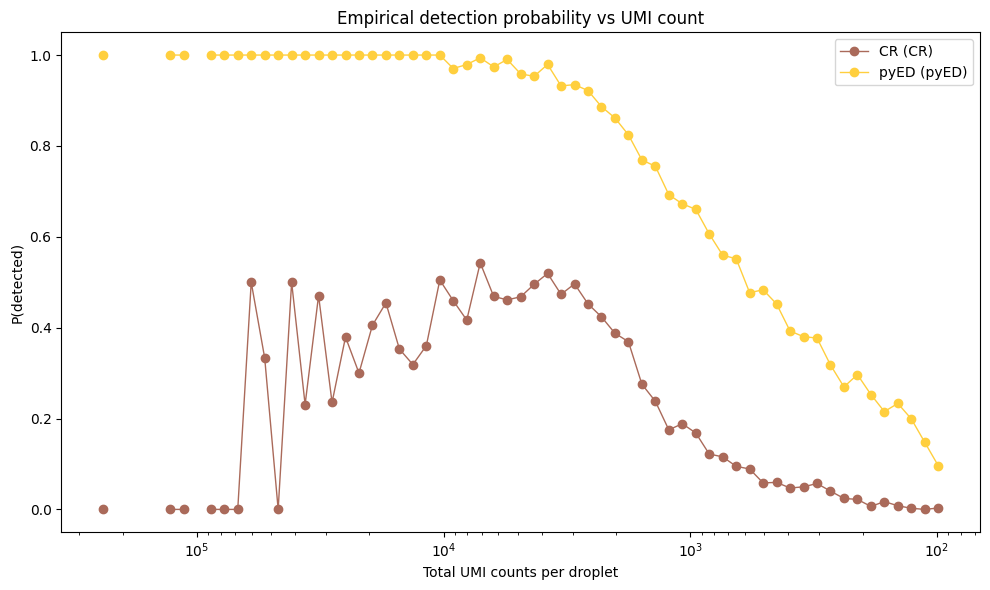

{'prob1': array([       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan, 0.00310559, 0.        , 0.00249066, 0.0080429 ,
        0.01716069, 0.00661157, 0.02197802, 0.02414487, 0.04024145,
        0.05701754, 0.04967603, 0.04712042, 0.05943152, 0.05833333,
        0.08894879, 0.09482759, 0.115625  , 0.121875  , 0.1682243 ,
        0.1886121 , 0.17509728, 0.23793103, 0.27564103, 0.36917563,
        0.38769231, 0.42382271, 0.45232274, 0.49638554, 0.47330097,
        0.51937984, 0.4953271 , 0.46792453, 0.46116505, 0.46875   ,
        0.54268293, 0.41666667, 0.45925

In [10]:
def plot_both_empirical_detection_probability(
    h5_raw1, h5_filtered1,
    h5_raw2, h5_filtered2,
    title_suffix="",
    title_2=""
):
    """
    Plot empirical detection probability for cell detection for two datasets in the same plot.

    Parameters:
    -----------
    h5_raw1, h5_raw2 : AnnData
        Raw count matrices for dataset 1 and 2
    h5_filtered1, h5_filtered2 : AnnData  
        Filtered count matrices (detected cells) for dataset 1 and 2
    title_suffix : str, optional
        Suffix to add to the first plot title
    title_2 : str, optional
        Title (or suffix) to use for the second plot
    
    Returns:
    --------
    dict : Dictionary containing probability data and bin centers for both plots
        {
            'prob1': ...,
            'centers1': ...,
            'df1': ...,
            'prob2': ...,
            'centers2': ...,
            'df2': ...
        }
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy.stats import binned_statistic

    def empirical_series(h5_raw, h5_filtered):
        h5_raw.obs['total_counts'] = h5_raw.X.sum(axis=1)
        h5_raw_filtered = h5_raw[h5_raw.obs.total_counts > 100].copy()
        df = pd.DataFrame({
            'umi': h5_raw_filtered.obs.total_counts,
            'detected': h5_raw_filtered.obs.index.isin(h5_filtered.obs.index).astype(int)
        })
        bins = np.logspace(np.log10(1), np.log10(df["umi"].max()), 100)
        prob, edges, _ = binned_statistic(df["umi"], df["detected"], statistic='mean', bins=bins)
        centers = (edges[:-1] + edges[1:]) / 2
        return prob, centers, df

    prob1, centers1, df1 = empirical_series(h5_raw1, h5_filtered1)
    prob2, centers2, df2 = empirical_series(h5_raw2, h5_filtered2)

    fig, ax = plt.subplots(1, 1, figsize=(10,6))

    # Plot both detection probability lines on the same axes
    ax.semilogx(centers1, prob1, 'o-', lw=1, color="#aa6a5a", label=f"CR{title_suffix}")
    ax.semilogx(centers2, prob2, 'o-', lw=1, color="#FFCF3E", label=f"pyED{title_2}" if title_2 else f"pyED{title_suffix}")
    ax.set_xlabel('Total UMI counts per droplet')
    ax.set_ylabel('P(detected)')
    ax.set_title('Empirical detection probability vs UMI count')
    ax.invert_xaxis()
    ax.legend()
    plt.tight_layout()
    plt.savefig("figures/05_both_empirical_detection_probability.png", dpi=300)
    plt.show()

    return {
        'prob1': prob1, 'centers1': centers1, 'df1': df1,
        'prob2': prob2, 'centers2': centers2, 'df2': df2
    }

plot_both_empirical_detection_probability(h5_raw, h5_filtered, h5_raw, h5_pyED, title_suffix=" (CR)", title_2=" (pyED)")

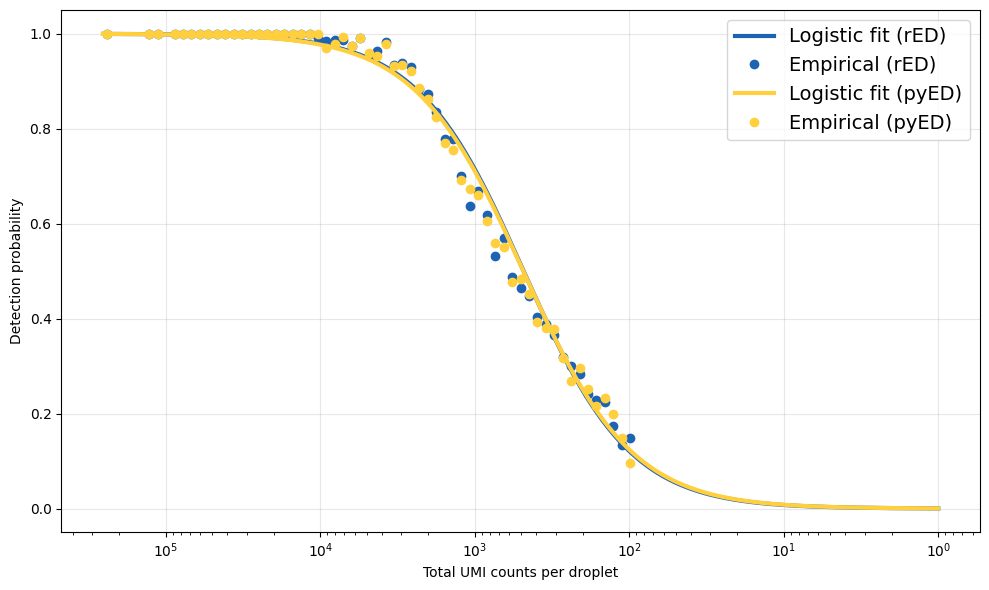

In [32]:
def plot_three_detection_probability(
    h5_raw1, h5_filtered1,
    h5_raw2, h5_filtered2,
    h5_raw3=None, h5_filtered3=None,
    title_suffix1=" (CR)",
    title_suffix2=" (pyED)",
    title_suffix3=" (rED)"
):
    """
    Plot empirical detection probability and logistic fit for cell detection for two or three sets of AnnData matrices.

    Parameters:
    -----------
    h5_raw1, h5_filtered1 : AnnData
        Raw and filtered count matrices for the first method (CR).
    h5_raw2, h5_filtered2 : AnnData
        Raw and filtered count matrices for the second method (pyED).
    h5_raw3, h5_filtered3 : AnnData, optional
        Raw and filtered count matrices for the third method (rED). If not provided, only two methods are compared.
    title_suffix1 : str, optional
        Suffix to add to CR plot label.
    title_suffix2 : str, optional
        Suffix to add to pyED plot label.
    title_suffix3 : str, optional
        Suffix to add to rED plot label.

    Returns:
    --------
    dict : Dictionary containing model parameters and data for all provided datasets.
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy.stats import binned_statistic
    import statsmodels.api as sm

    def fit_detection_logit(h5_raw, h5_filtered):
        h5_raw.obs['total_counts'] = h5_raw.X.sum(axis=1)
        h5_raw_filtered = h5_raw[h5_raw.obs.total_counts > 100].copy()
        df = pd.DataFrame({
            'umi': h5_raw_filtered.obs.total_counts,
            'detected': h5_raw_filtered.obs.index.isin(h5_filtered.obs.index).astype(int)
        })
        bins = np.logspace(np.log10(1), np.log10(df["umi"].max()), 100)
        prob, edges, _ = binned_statistic(df["umi"], df["detected"], statistic='mean', bins=bins)
        centers = (edges[:-1] + edges[1:]) / 2

        df = df[df["umi"] > 0].copy()
        df["log_umi"] = np.log10(df["umi"])
        X = sm.add_constant(df["log_umi"])
        model = sm.Logit(df["detected"], X).fit(disp=False)
        a, b = model.params
        umi_range = np.logspace(0, np.log10(df["umi"].max()), 200)
        p_pred = 1 / (1 + np.exp(-(a + b * np.log10(umi_range))))
        return {
            'model': model,
            'a': a,
            'b': b,
            'empirical_prob': prob,
            'empirical_centers': centers,
            'umi_range': umi_range,
            'p_pred': p_pred,
            'df': df
        }

    # Always fit and plot first two (CR, pyED)
    result1 = fit_detection_logit(h5_raw1, h5_filtered1)
    result2 = fit_detection_logit(h5_raw2, h5_filtered2)
    has_red = h5_raw3 is not None and h5_filtered3 is not None

    result3 = None
    if has_red:
        result3 = fit_detection_logit(h5_raw3, h5_filtered3)

    plt.figure(figsize=(10, 6))
    # Plot CR lines (first AnnData pair)
    plt.semilogx(
        result1['umi_range'], result1['p_pred'],
        '-', color="#1D63B4", lw=3, label=f'Logistic fit{title_suffix3}'
    )
    plt.semilogx(
        result1['empirical_centers'], result1['empirical_prob'],
        'o', color="#1D63B4", label=f'Empirical{title_suffix3}'
    )


    # Optionally plot rED lines (third AnnData pair)
    if has_red:
        plt.semilogx(
            result3['umi_range'], result3['p_pred'],
            '-', color="#1D63B4", lw=3, label=f'Logistic fit{title_suffix3}'
        )
        plt.semilogx(
            result3['empirical_centers'], result3['empirical_prob'],
            'o', color="#5093EB", label=f'Empirical{title_suffix3}'
        )

        # Plot pyED lines (second AnnData pair)
    plt.semilogx(
        result2['umi_range'], result2['p_pred'],
        '-', color="#FFCF3E", lw=3, label=f'Logistic fit{title_suffix2}'
    )
    plt.semilogx(
        result2['empirical_centers'], result2['empirical_prob'],
        'o', color="#FFCF3E", label=f'Empirical{title_suffix2}'
    )

    plt.xlabel('Total UMI counts per droplet')
    plt.ylabel('Detection probability')
    plt.legend(fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.gca().invert_xaxis()
    plt.tight_layout()
    if has_red:
        plt.savefig("figures/05_all3_detection_probability.pdf", dpi=300)
    else:
        plt.savefig("figures/05_pyED-rED_detection_probability.pdf", dpi=300)
    plt.show()

    output = {
        'cr': {
            'model_params': {'a': result1['a'], 'b': result1['b']},
            'empirical_data': {'centers': result1['empirical_centers'], 'prob': result1['empirical_prob']},
            'prediction_data': {'umi_range': result1['umi_range'], 'p_pred': result1['p_pred']}
        },
        'pyed': {
            'model_params': {'a': result2['a'], 'b': result2['b']},
            'empirical_data': {'centers': result2['empirical_centers'], 'prob': result2['empirical_prob']},
            'prediction_data': {'umi_range': result2['umi_range'], 'p_pred': result2['p_pred']}
        }
    }

    if has_red:
        output['red'] = {
            'model_params': {'a': result3['a'], 'b': result3['b']},
            'empirical_data': {'centers': result3['empirical_centers'], 'prob': result3['empirical_prob']},
            'prediction_data': {'umi_range': result3['umi_range'], 'p_pred': result3['p_pred']}
        }

    return output

# Example usage:
# With rED:
#result = plot_three_detection_probability(h5_raw, h5_filtered, h5_raw, h5_pyED, h5_raw, h5_rED)
# Without rED:
result = plot_three_detection_probability(h5_raw, h5_rED, h5_raw, h5_pyED)